In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
## Importing different model classes from the scikit-learn library
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [53]:
data = pd.read_csv("files/Toddler Autism dataset July 2018.csv")

data = data.drop(columns=["Case_No","Ethnicity","Who completed the test","Age_Mons","Sex","Jaundice","Family_mem_with_ASD","Class/ASD Traits"])
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score
0,0,0,0,0,0,0,1,1,0,1,3
1,1,1,0,0,0,1,1,0,0,0,4
2,1,0,0,0,0,0,1,1,0,1,4
3,1,1,1,1,1,1,1,1,1,1,10
4,1,1,0,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,1
1050,0,0,1,1,1,0,1,0,1,0,5
1051,1,0,1,1,1,1,1,1,1,1,9
1052,1,0,0,0,0,0,0,1,0,1,3


In [73]:
data['Qchat-10-Score'].value_counts()

7     135
5     120
4     110
8      97
3      96
6      96
9      95
2      88
1      88
10     75
0      54
Name: Qchat-10-Score, dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   A1              1054 non-null   int64
 1   A2              1054 non-null   int64
 2   A3              1054 non-null   int64
 3   A4              1054 non-null   int64
 4   A5              1054 non-null   int64
 5   A6              1054 non-null   int64
 6   A7              1054 non-null   int64
 7   A8              1054 non-null   int64
 8   A9              1054 non-null   int64
 9   A10             1054 non-null   int64
 10  Qchat-10-Score  1054 non-null   int64
dtypes: int64(11)
memory usage: 90.7 KB


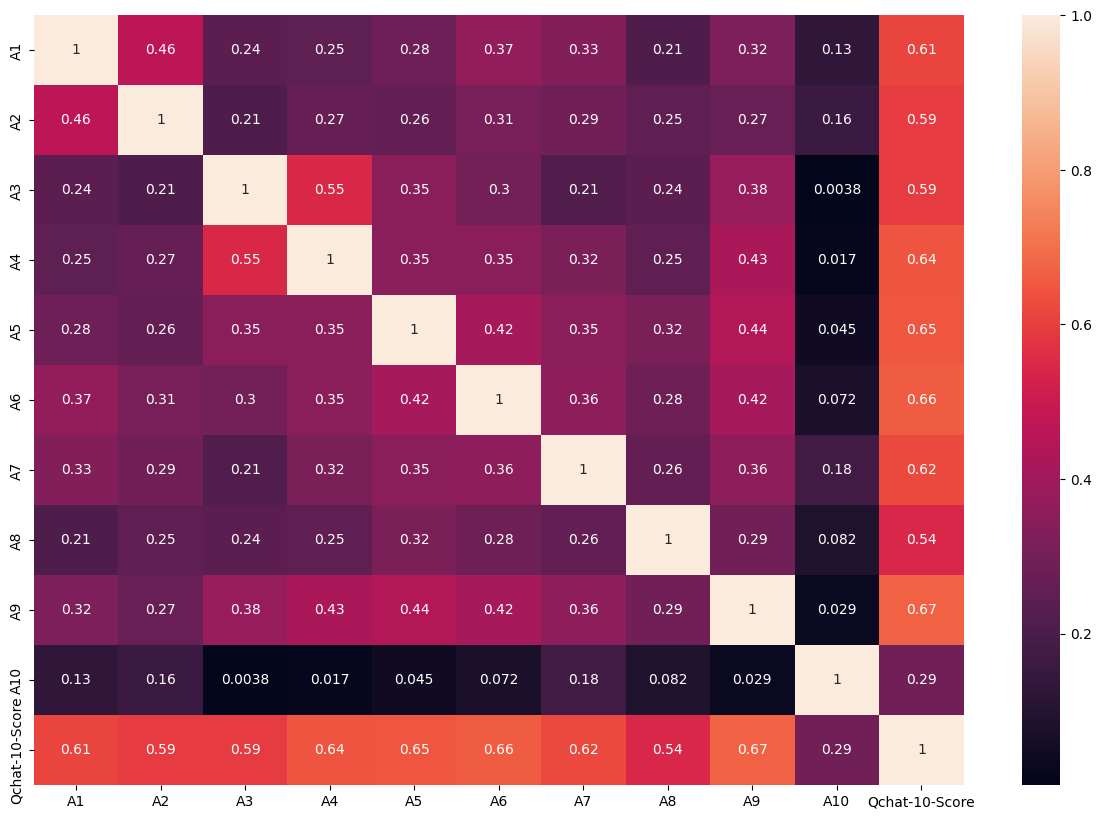

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

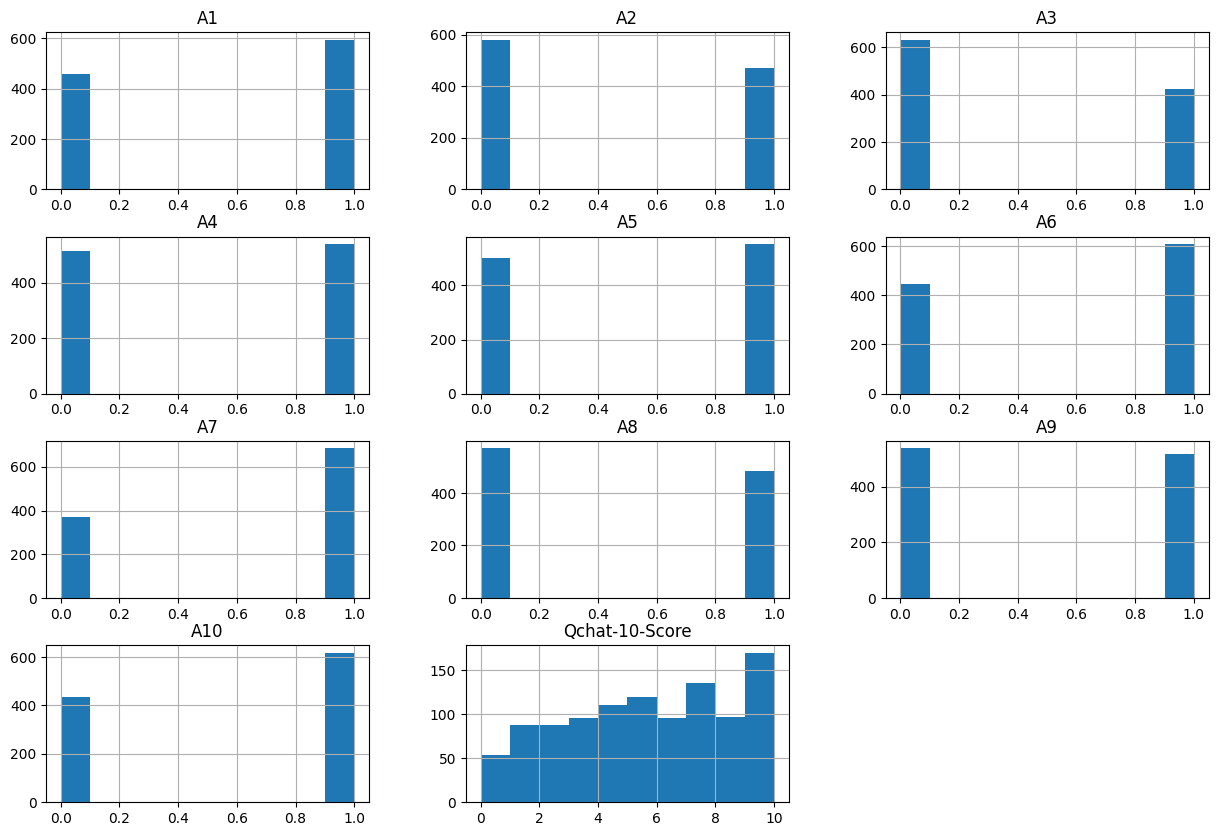

In [56]:
data.hist(figsize=(15,10))
plt.show()

In [57]:
data.to_csv("files/final-data.csv",index=False)

In [58]:
X = data.drop(columns=["Qchat-10-Score"])
y = data["Qchat-10-Score"]

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [60]:
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train,y_train)
rf_pred = rfclassifier.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred,average='weighted')
rf_precision = precision_score(y_test,rf_pred,average='weighted')
rf_recall = recall_score(y_test,rf_pred,average='weighted')
print("F1 score:",rf_f1)
print("Precision score:",rf_precision)
print("Recall score:",rf_recall)
print("Accuracy score:",rf_accuracy)

F1 score: 0.7714107130889958
Precision score: 0.7743780103190882
Recall score: 0.7725118483412322
Accuracy score: 0.7725118483412322


In [61]:
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train,y_train)
rf_pred = rfclassifier.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred,average='weighted')
rf_precision = precision_score(y_test,rf_pred,average='weighted')
rf_recall = recall_score(y_test,rf_pred,average='weighted')
print("F1 score:",rf_f1)
print("Precision score:",rf_precision)
print("Recall score:",rf_recall)


F1 score: 0.7787290275278743
Precision score: 0.7861086815262633
Recall score: 0.7772511848341233


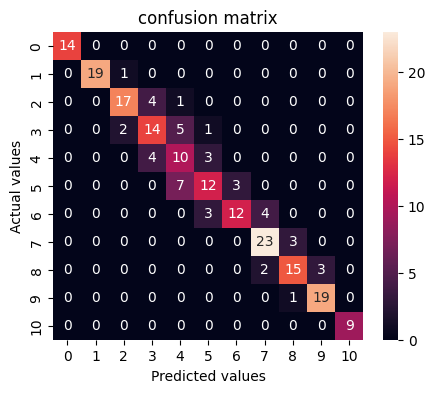

In [62]:
plt.figure(figsize=(5,4))
plt.title("confusion matrix")
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [63]:
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)
dt_pred = dtclassifier.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred,average='weighted')
dt_precision = precision_score(y_test,dt_pred,average='weighted')
dt_recall = recall_score(y_test,dt_pred,average='weighted')
print("F1 score:",dt_f1)
print("Precision score:",dt_precision)
print("Recall score:",dt_recall)
print("Accuracy score:",dt_accuracy)

F1 score: 0.7999316738923546
Precision score: 0.8089753271695006
Recall score: 0.8009478672985783
Accuracy score: 0.8009478672985783


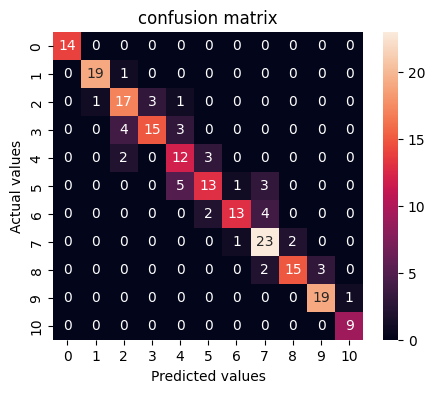

In [64]:
plt.figure(figsize=(5,4))
plt.title("confusion matrix")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [65]:
adclassifier = AdaBoostClassifier()
adclassifier.fit(X_train,y_train)
ad_pred = adclassifier.predict(X_test)
ad_accuracy = accuracy_score(y_test,ad_pred)
rf_f1 = f1_score(y_test,rf_pred,average='weighted')
rf_precision = precision_score(y_test,rf_pred,average='weighted')
rf_recall = recall_score(y_test,rf_pred,average='weighted')
print("F1 score:",rf_f1)
print("Precision score:",rf_precision)
print("Recall score:",rf_recall)
print("Accuracy score:",ad_accuracy)

F1 score: 0.7787290275278743
Precision score: 0.7861086815262633
Recall score: 0.7772511848341233
Accuracy score: 0.18009478672985782


c:\Users\91997\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


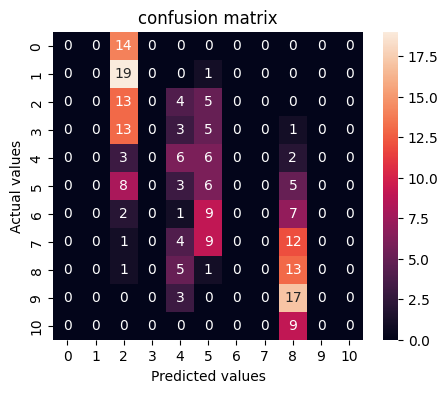

In [66]:
plt.figure(figsize=(5,4))
plt.title("confusion matrix")
sns.heatmap(confusion_matrix(y_test,ad_pred),annot=True,fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [67]:
gbclassifier = GradientBoostingClassifier()
gbclassifier.fit(X_train,y_train)
gb_pred = gbclassifier.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
gb_f1 = f1_score(y_test,gb_pred,average='weighted')
gb_precision = precision_score(y_test,gb_pred,average='weighted')
gb_recall = recall_score(y_test,gb_pred,average='weighted')
print("F1 score:",gb_f1)
print("Precision score:",gb_precision)
print("Recall score:",gb_recall)
print("Accuracy score:",gb_accuracy)

F1 score: 0.6223120043783884
Precision score: 0.6383020762954338
Recall score: 0.6255924170616114
Accuracy score: 0.6255924170616114


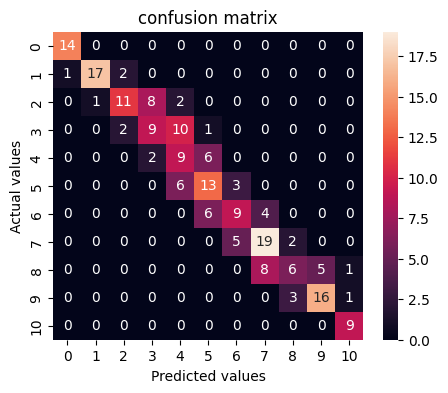

In [68]:
plt.figure(figsize=(5,4))
plt.title("confusion matrix")
sns.heatmap(confusion_matrix(y_test,gb_pred),annot=True,fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

# ANN

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
 
y_train_encoded = to_categorical(y_train, num_classes=11)
y_test_encoded = to_categorical(y_test, num_classes=11)

model = Sequential()
 
model.add(Dense(128, input_dim=10, activation='relu'))
 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
 
model.add(Dense(11, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
 
model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded))

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {accuracy}')
 
model.save('my_model.h5')

Epoch 1/50
27/27 [==============================] - 4s 15ms/step - loss: 2.3316 - accuracy: 0.1103 - val_loss: 2.2365 - val_accuracy: 0.1232
Epoch 2/50
27/27 [==============================] - 0s 14ms/step - loss: 2.1734 - accuracy: 0.1839 - val_loss: 2.0578 - val_accuracy: 0.2607
Epoch 3/50
27/27 [==============================] - 0s 8ms/step - loss: 1.9820 - accuracy: 0.2752 - val_loss: 1.7838 - val_accuracy: 0.3507
Epoch 4/50
27/27 [==============================] - 0s 6ms/step - loss: 1.7297 - accuracy: 0.3179 - val_loss: 1.5106 - val_accuracy: 0.4265
Epoch 5/50
27/27 [==============================] - 0s 6ms/step - loss: 1.5400 - accuracy: 0.3677 - val_loss: 1.2995 - val_accuracy: 0.4739
Epoch 6/50
27/27 [==============================] - 0s 6ms/step - loss: 1.3498 - accuracy: 0.4330 - val_loss: 1.1148 - val_accuracy: 0.6161
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 1.2114 - accuracy: 0.4970 - val_loss: 0.9714 - val_accuracy: 0.6919
Epoch 8/50
27/27 [

In [78]:
ann_pred = model.predict(X_test)
 
ann_pred_classes = np.argmax(ann_pred, axis=1)
 
y_test_classes = np.argmax(y_test_encoded, axis=1)
 
ann_accuracy = accuracy_score(y_test_classes, ann_pred_classes)
ann_f1 = f1_score(y_test_classes, ann_pred_classes, average='weighted')
ann_precision = precision_score(y_test_classes, ann_pred_classes, average='weighted')
ann_recall = recall_score(y_test_classes, ann_pred_classes, average='weighted')
 
print("F1 score:", ann_f1)
print("Precision score:", ann_precision)
print("Recall score:", ann_recall)
print("Accuracy score:", ann_accuracy)

7/7 [==============================] - 0s 3ms/step
F1 score: 0.9952576995693397
Precision score: 0.9954863461972466
Recall score: 0.995260663507109
Accuracy score: 0.995260663507109


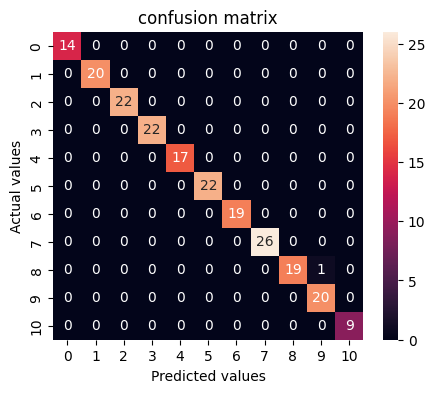

In [80]:
plt.figure(figsize=(5,4))
plt.title("confusion matrix")
sns.heatmap(confusion_matrix(y_test_classes,ann_pred_classes),annot=True,fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()